<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/G100A007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import numpy as np
import pandas as pd
#input data
train = pd.read_csv("/content/FE_pima-indians-diabetes2.csv")
print(train.head())


          6       148        72        35      33.6     0.627        50  \
0 -0.843726 -1.122086 -0.160249  0.532023 -0.683729 -0.364265 -0.188940   
1  1.234240  1.944476 -0.263578 -1.286882 -1.102301  0.604701 -0.103795   
2 -0.843726 -0.996920 -0.160249  0.155698 -0.493469 -0.919684 -1.040393   
3 -1.140579  0.505069 -1.503534  0.908349  1.409132  5.482732 -0.018650   
4  0.343683 -0.152051  0.253070 -1.286882 -0.810569 -0.817052 -0.274086   

          1  
0 -0.730753  
1  1.368451  
2 -0.730753  
3  1.368451  
4 -0.730753  


In [164]:
 
NaN_col_names = ['Pregnancies','Glucose','Blood_Pressure','Skin_Thickness']
#train[NaN_col_names] = train[NaN_col_names].replace(0, np.NaN)
print(train.isnull().sum())

6        0
148      0
72       0
35       0
33.6     0
0.627    0
50       0
1        0
dtype: int64


In [165]:
medians = train.median() 
train = train.fillna(medians)

print(train.isnull().sum())

6        0
148      0
72       0
35       0
33.6     0
0.627    0
50       0
1        0
dtype: int64


In [167]:
import numpy as np
import pandas as pd
#中值補充確實值
medians = train.median() 
train = train.fillna(medians)

print(train.isnull().sum())


#  get labels
#y_train = train.drop([0'], axis=1)  
X_train = train.drop(["72"], axis=1)
#用於保存特徵工程之後的結果
feat_names = X_train.columns

# 數據標準化
from sklearn.preprocessing import StandardScaler

# 初始化特徵的標準化器
ss_X = StandardScaler()

# 分別對訓練和測試數據的特徵進行標準化處理
X_train = ss_X.fit_transform(X_train)

#存爲csv格式
X_train = pd.DataFrame(columns = feat_names, data = X_train)

train = pd.concat([X_train], axis = 1)

train.to_csv('FE_pima-indians-diabetes.csv',index = False,header=True)

print(train.head())

6        0
148      0
72       0
35       0
33.6     0
0.627    0
50       0
1        0
dtype: int64
          6       148        35      33.6     0.627        50         1
0 -0.844681 -1.121387  0.531095 -0.684212 -0.365745 -0.188804 -0.730846
1  1.231309  1.940742 -1.286755 -1.102139  0.601848 -0.103703  1.368276
2 -0.844681 -0.996403  0.154988 -0.494245 -0.920379 -1.039817 -0.730846
3 -1.141251  0.503416  0.907202  1.405423  5.472973 -0.018602  1.368276
4  0.341599 -0.152755 -1.286755 -0.810857 -0.817892 -0.273906 -0.730846


In [168]:
# 首先 import 必要的模塊
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#%matplotlib inline

In [182]:

train = pd.read_csv('/content/FE_pima-indians-diabetes2.csv')

y_train = train[1:764]   
X_train = train.drop(["50"], axis=1)


In [184]:

#保存特徵名字以備後用（可視化）
feat_names = X_train.columns 

#需要調優的參數
# 請嘗試將L1正則和L2正則分開，並配合合適的優化求解算法（slover）
penaltys = ['l1','l2']

#訓練數據多，C可以大一點（更多相信數據）
Cs = [0.01, 0.1, 1, 10, 100, 1000, 10000]

tuned_parameters = dict(penalty = penaltys, C = Cs)#組合調優參數


In [195]:
lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')#log似然損失
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='accuracy')#正確率


In [203]:
 
 # plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
 
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
 

 

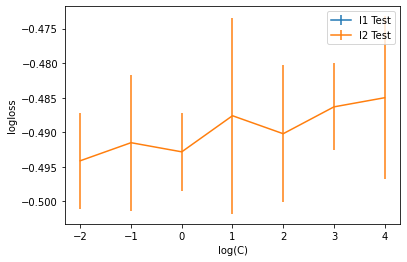

In [206]:
x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    plt.errorbar(x_axis, -test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    #plt.errorbar(x_axis, -train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'logloss' )
plt.savefig('LogisticGridSearchCV_C.png' )

plt.show()
 

 


In [105]:
import numpy as np
import pandas as pd
#input data
train = pd.read_csv("/content/FE_pima-indians-diabetes.csv")
print(train.head())

#查看缺失值較多的數據統計
NaN_col_names = ['Plasma_glucose_concentration','blood_pressure','Triceps_skin_fold_thickness','serum_insulin','BMI']
#train[NaN_col_names] = train[NaN_col_names].replace(0, np.NaN)
print(train.isnull().sum())


#中值補充確實值
medians = train.median() 
train = train.fillna(medians)

print(train.isnull().sum())


#  get labels
#y_train = train[1:768]   
X_train = train.drop(["72"], axis=1)

#用於保存特徵工程之後的結果
feat_names = X_train.columns

# 數據標準化
from sklearn.preprocessing import StandardScaler

# 初始化特徵的標準化器
ss_X = StandardScaler()

# 分別對訓練和測試數據的特徵進行標準化處理
X_train = ss_X.fit_transform(X_train)

#存爲csv格式
X_train = pd.DataFrame(columns = feat_names, data = X_train)

train = pd.concat([X_train, y_train], axis = 1)

train.to_csv('/content/FE_pima-indians-diabetes.csv',index = False,header=True)

print(train.head())

          6       148        72        35      33.6     0.627        50  \
0 -0.843726 -1.122086 -0.160249  0.532023 -0.683729 -0.364265 -0.188940   
1  1.234240  1.944476 -0.263578 -1.286882 -1.102301  0.604701 -0.103795   
2 -0.843726 -0.996920 -0.160249  0.155698 -0.493469 -0.919684 -1.040393   
3 -1.140579  0.505069 -1.503534  0.908349  1.409132  5.482732 -0.018650   
4  0.343683 -0.152051  0.253070 -1.286882 -0.810569 -0.817052 -0.274086   

          1  
0 -0.730753  
1  1.368451  
2 -0.730753  
3  1.368451  
4 -0.730753  
6        0
148      0
72       0
35       0
33.6     0
0.627    0
50       0
1        0
dtype: int64
6        0
148      0
72       0
35       0
33.6     0
0.627    0
50       0
1        0
dtype: int64
          6       148        35      33.6     0.627        50         1    0
0 -0.843726 -1.122086  0.532023 -0.683729 -0.364265 -0.188940 -0.730753    0
1  1.234240  1.944476 -1.286882 -1.102301  0.604701 -0.103795  1.368451    0
2 -0.843726 -0.996920  0.155698 

In [215]:
!pip install matplotlib-venn

!apt-get -qq install -y libfluidsynth1




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155637 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.7 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=0c1c19ba413c18864cfb0faa2984636ed113da99894b2078022781a27999e84f
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [210]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 3.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 23.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 24.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 28.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 2.3 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516275 sha256=4c4f19a2fd9c1f66adce466434ed0811e2743b473c3f2d1cd36ceff843352563
  Stored in directory: /root/.cache/pip/whee

In [218]:
 from sklearn.cross_validation import cross_val_score


ModuleNotFoundError: ignored

In [219]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

ModuleNotFoundError: ignored

In [220]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [226]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=10)

In [228]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 1.         1.         0.93333333 1.        ]
0.9800000000000001


In [229]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

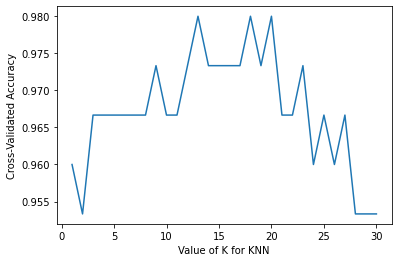

In [230]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()